In [83]:
import pandas as pd
import numpy as np

In [84]:
df = pd.read_csv('datasets/train.csv')

In [85]:
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [86]:
df.shape

(4209, 378)

In [87]:
df.isna().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [88]:
df = df.select_dtypes(['float','integer'])

In [89]:
df.shape

(4209, 370)

In [90]:
df.head()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
x = df.drop(columns=['y'], axis=1)
y = df[['y']]

In [94]:
# Build a pipeline function to make pre-processing easier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,mean_absolute_error,mean_squared_error
import joblib

def data_split_standardise(x,y=None):
    if y is None:
        st=StandardScaler()
        st.fit(x)
        x_std=st.transform(x)
        joblib.dump(st,"model_objects/StandardScalar_trained.h5")
        return(x_std)
    else:

        
        
        
        x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
        st=StandardScaler()
        st.fit(x_train)
        x_train_std=st.transform(x_train)
        x_test_std=st.transform(x_test)
        joblib.dump(st,"model_objects/StandardScalar_trained.h5")    
        return (x_train_std, x_test_std, y_train, y_test)

In [96]:
x_train_std, x_test_std, y_train, y_test = data_split_standardise(x,y)

In [97]:
from sklearn.decomposition import PCA

In [98]:
pcaModel = PCA(n_components=0.95)
pcaModel.fit(x_train_std)

PCA(n_components=0.95)

In [99]:
x_train_red=pcaModel.transform(x_train_std)
x_test_red=pcaModel.transform(x_test_std)

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Input

In [101]:
model = Sequential()

model.add(Dense(100,activation='relu'))
model.add(BatchNormalization())

model.add(Dense(80,activation='relu'))
model.add(BatchNormalization())

model.add(Dense(50,activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1,activation='relu'))


In [102]:
model.compile(loss='mae',metrics=['mse'],optimizer='adam')

In [103]:
from livelossplot import PlotLossesKerasTF

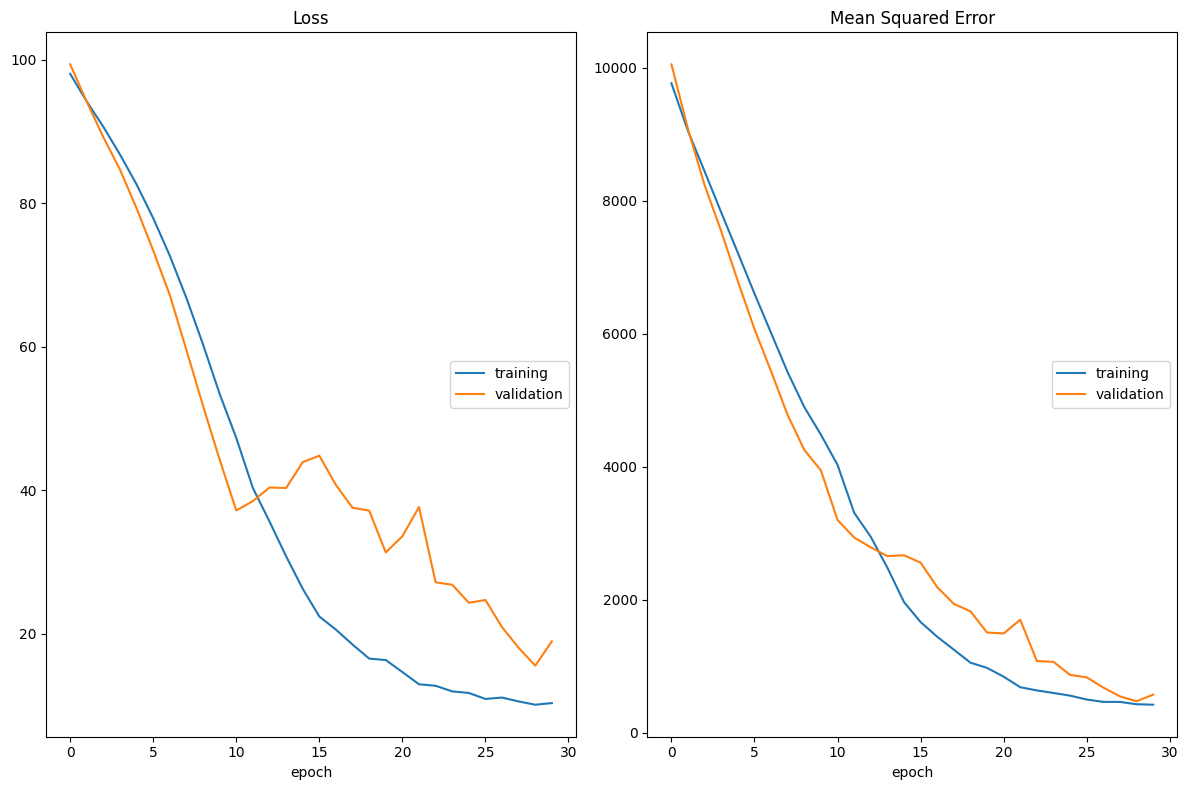

Loss
	training         	 (min:   10.151, max:   98.023, cur:   10.374)
	validation       	 (min:   15.595, max:   99.347, cur:   18.982)
Mean Squared Error
	training         	 (min:  423.498, max: 9764.046, cur:  423.498)
	validation       	 (min:  475.686, max: 10048.938, cur:  574.423)
50/50 [==============================] - 1s 11ms/step - loss: 10.3742 - mse: 423.4983 - val_loss: 18.9820 - val_mse: 574.4233


In [104]:
model.fit(
    x_train_red,
    y_train,epochs=30,
    batch_size=64,
    validation_data=(x_test_red,y_test),
    callbacks=[PlotLossesKerasTF()]
)

In [105]:
from tensorflow.keras.metrics import mean_absolute_percentage_error

In [109]:
pred_df = pd.read_csv('datasets/train.csv')

pred_df = pred_df.select_dtypes(['float','integer'])
pred_x = df.drop(columns=['y'], axis=1)
pred_y = df[['y']]

sc = joblib.load('model_objects/StandardScalar_trained.h5')
pred_x_std = sc.transform(pred_x)
pred_x_red = pcaModel.transform(pred_x_std)

In [116]:
pred_y_model = pd.DataFrame(model.predict(pred_x_red))

132/132 [==============================] - 0s 1ms/step


In [115]:
pred_y

,y
0,130.81
1,88.53
2,76.26
3,80.62
4,78.02
...,...
4204,107.39
4205,108.77
4206,109.22
4207,87.48


In [117]:
pred_y_model

,0
0,0.000000
1,105.293831
2,102.163925
3,102.918182
4,0.000000
...,...
4204,121.135376
4205,123.109985
4206,124.949341
4207,107.901962
